## Diffusion of a bell-shaped initial concentration along an initial gradient
A single chemical, whose initial concentration is a mix of a bell shape and a gradient.   
Contrary to perhaps an intuition of a "pile sliding down a sand dune as a unit", the concentration peak
remains in place, and simply spreads out from there

LAST REVISED: June 23, 2024 (using v. 1.0 beta34.1)

In [1]:
import set_path      # Importing this module will add the project's home directory to sys.path

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from life123 import BioSim1D

from life123 import ChemData as chem

In [3]:
# Initialize the system
chem_data = chem(names=["A"], diffusion_rates=[10.])

bio = BioSim1D(n_bins=200, chem_data=chem_data)

In [4]:
# Set up the initial bell-shape concentration, with the peak close to one end of the system
bio.inject_bell_curve(species_name="A", mean=0.25, sd=0.1, amplitude=20., bias=0)

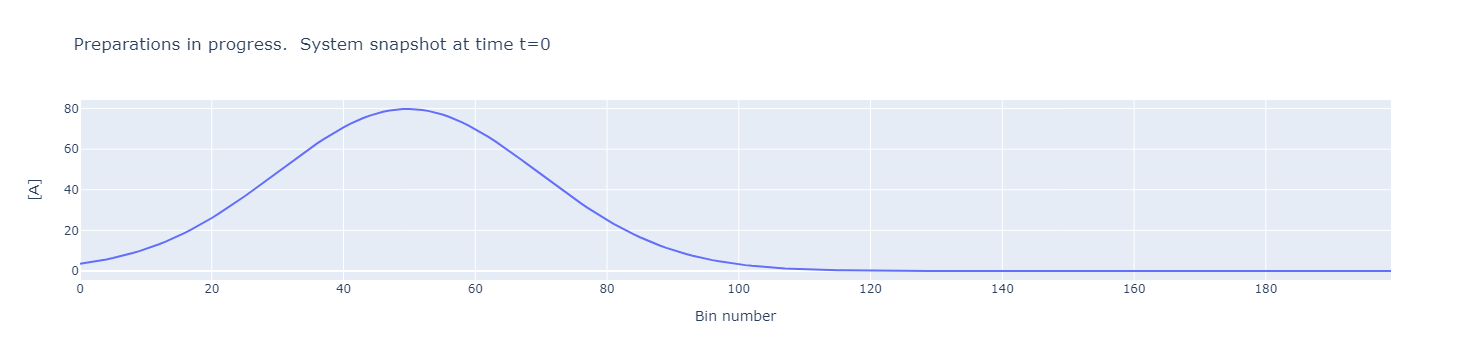

In [5]:
# Visualize the system state so far
bio.visualize_system(caption="Preparations in progress")

In [6]:
# Complete the initial-system preparation by adding a gradient slanting to the right
bio.inject_gradient("A", conc_left = 50., conc_right = 0.)

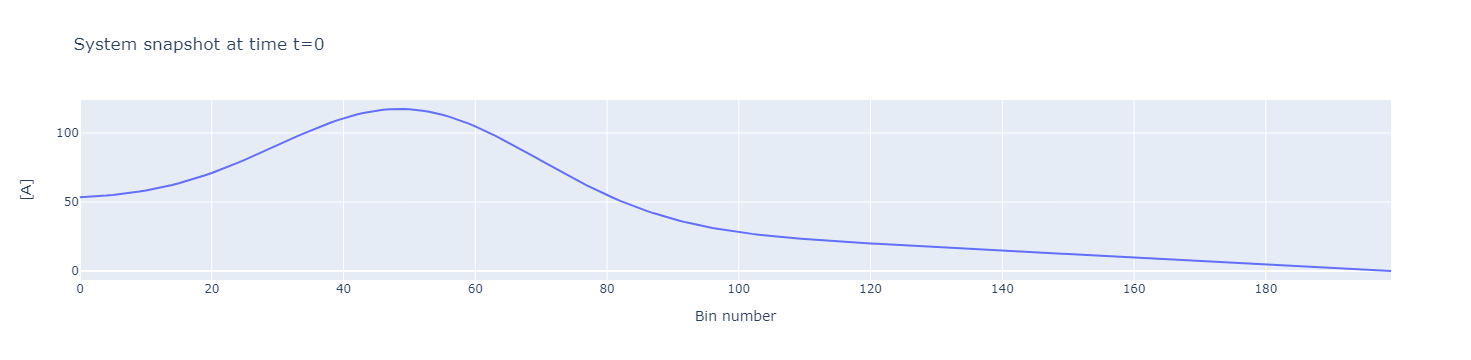

In [7]:
# Visualize the complete initial state
bio.visualize_system()

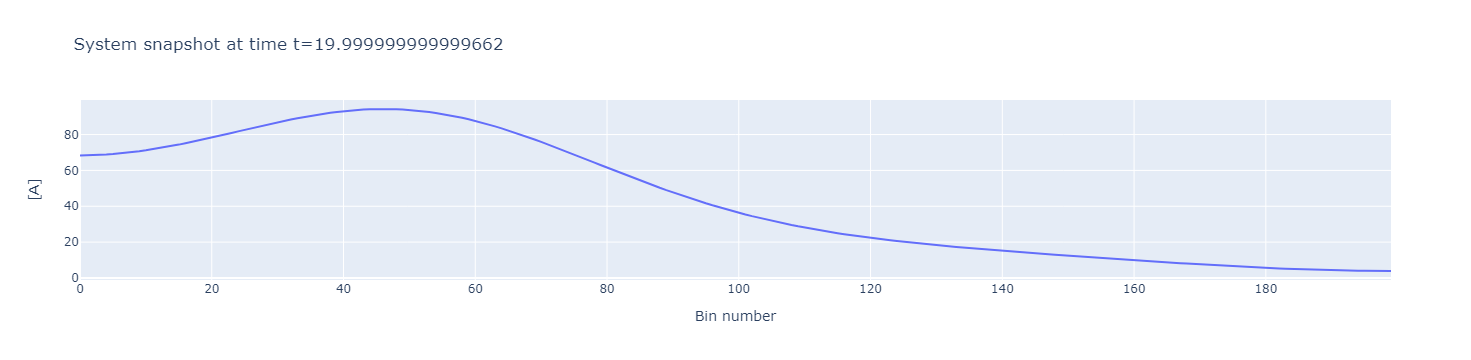

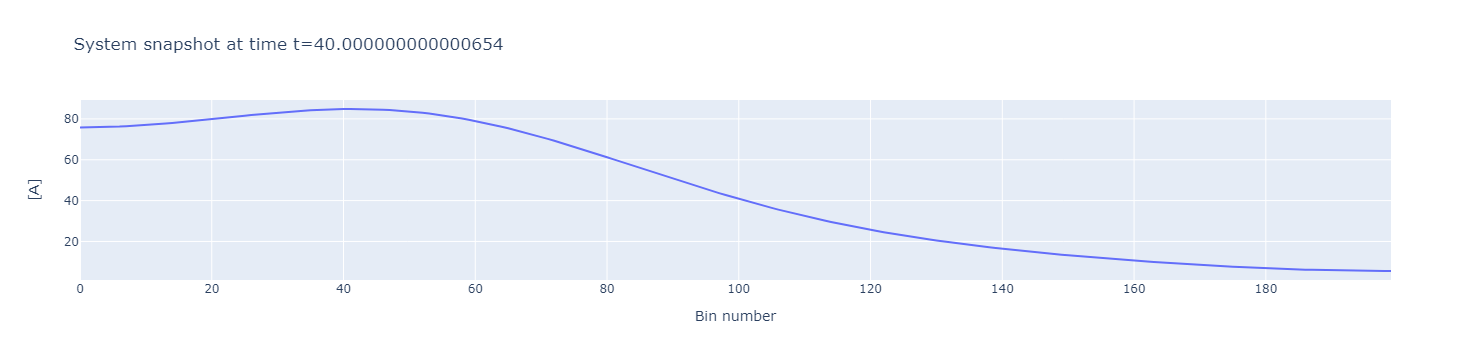

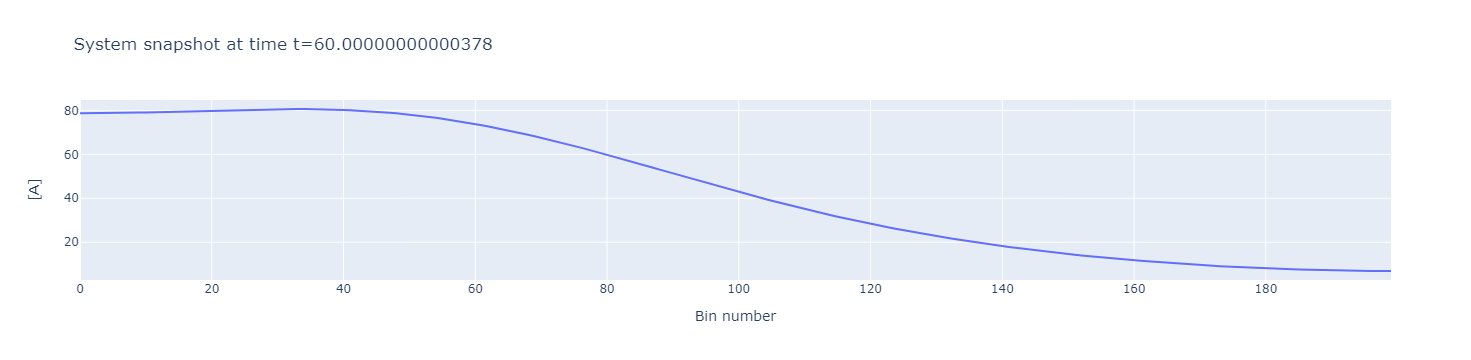

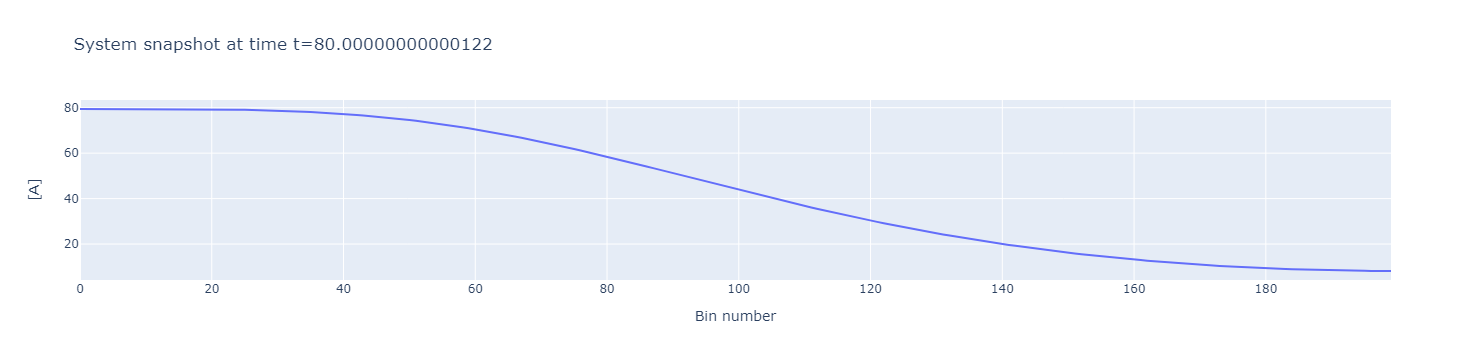

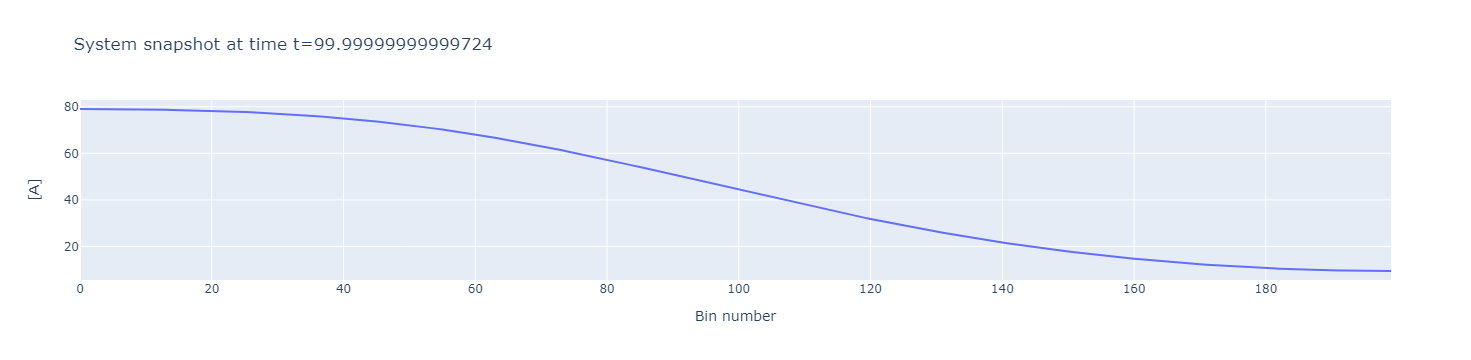

In [8]:
# Do several round of diffusion, over relatively small times
for _ in range(5):
    bio.diffuse(total_duration=20, n_steps=1000)
    bio.visualize_system()

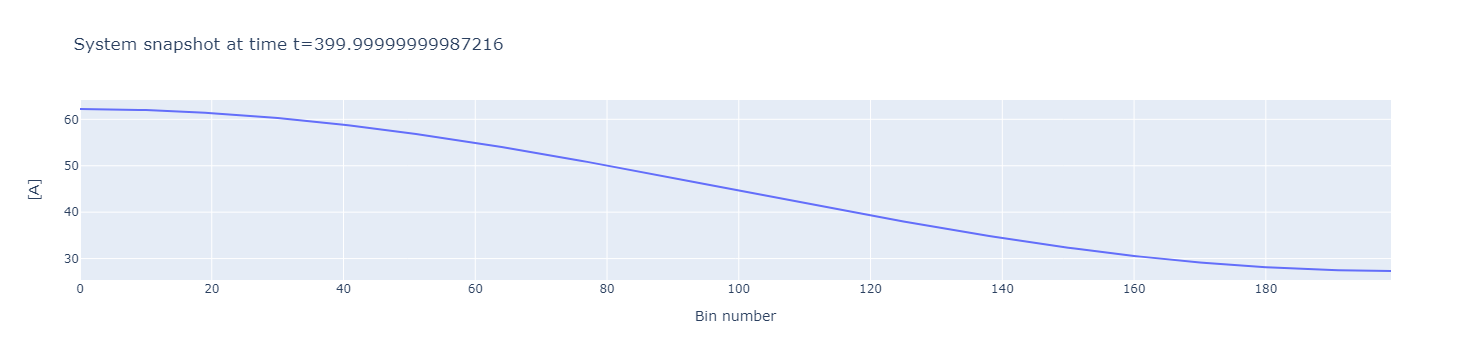

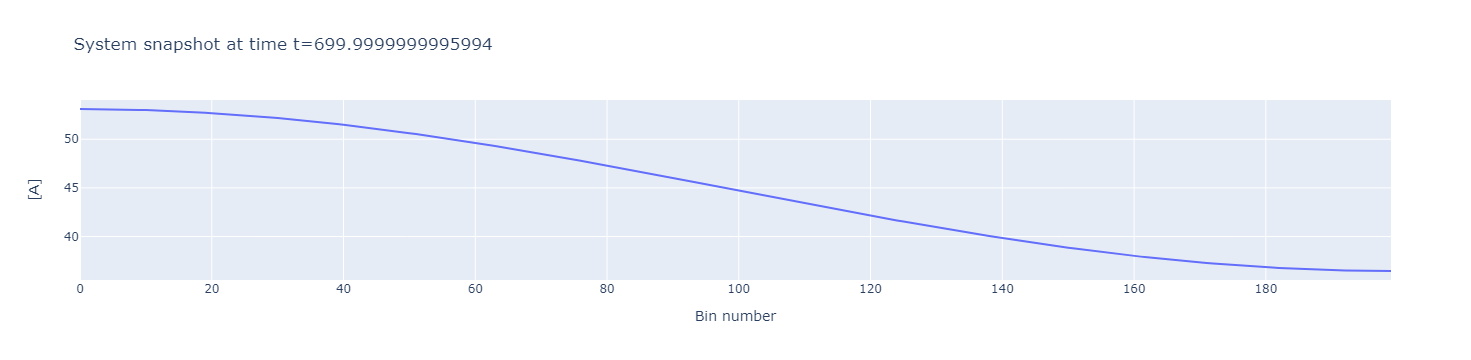

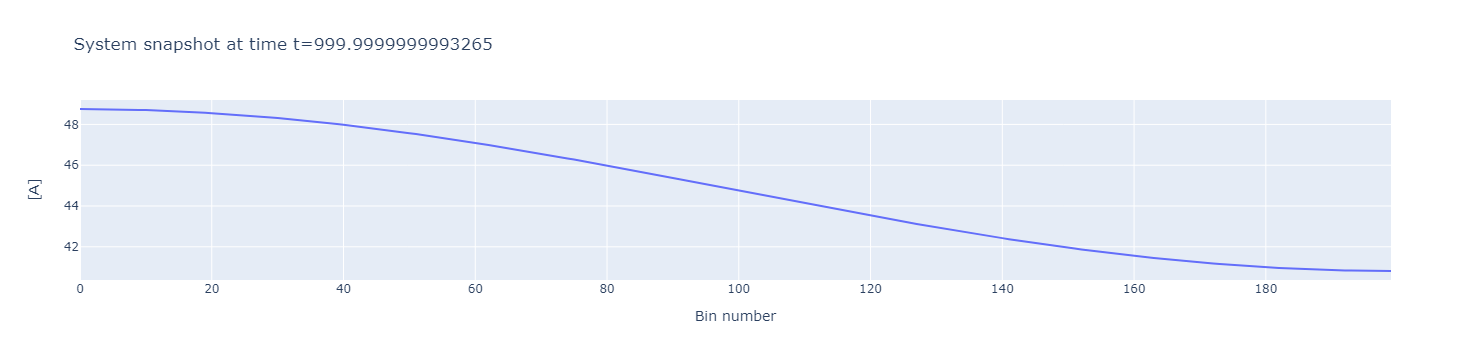

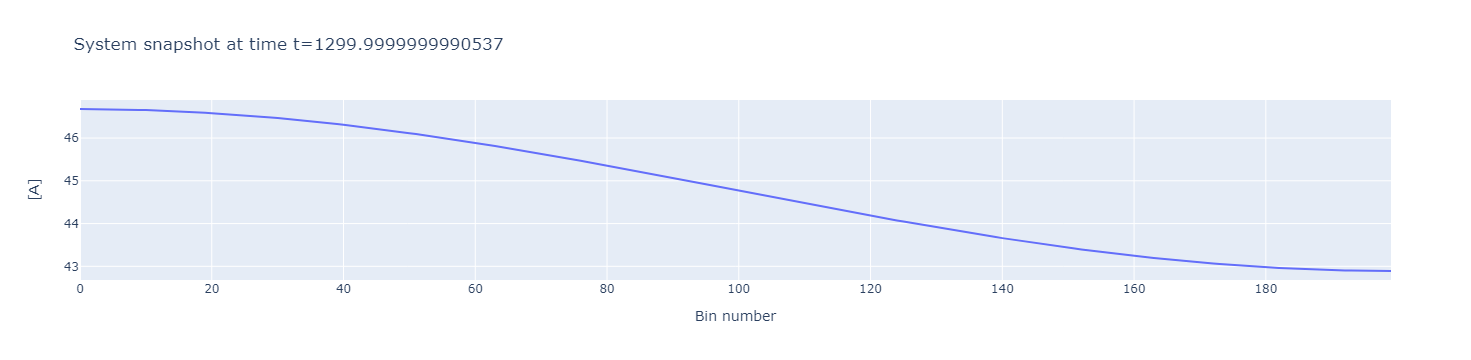

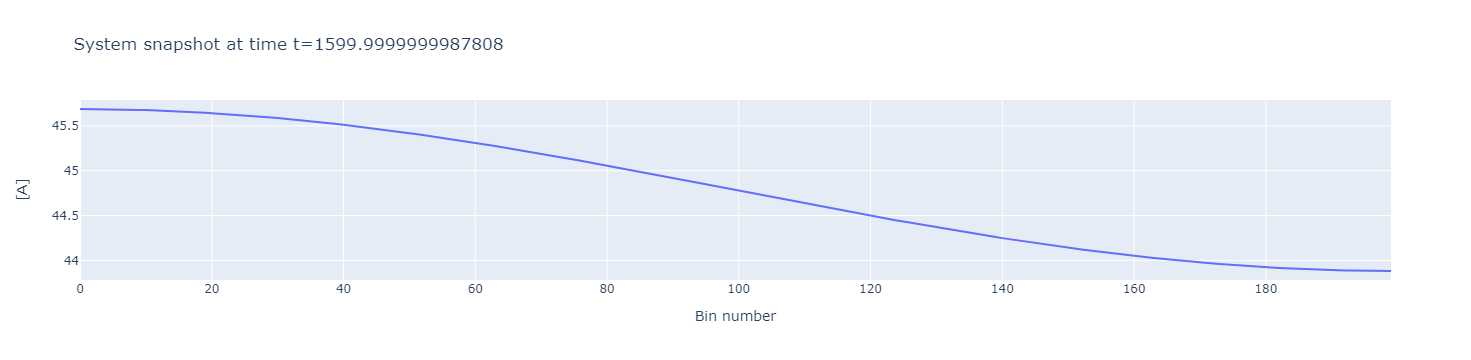

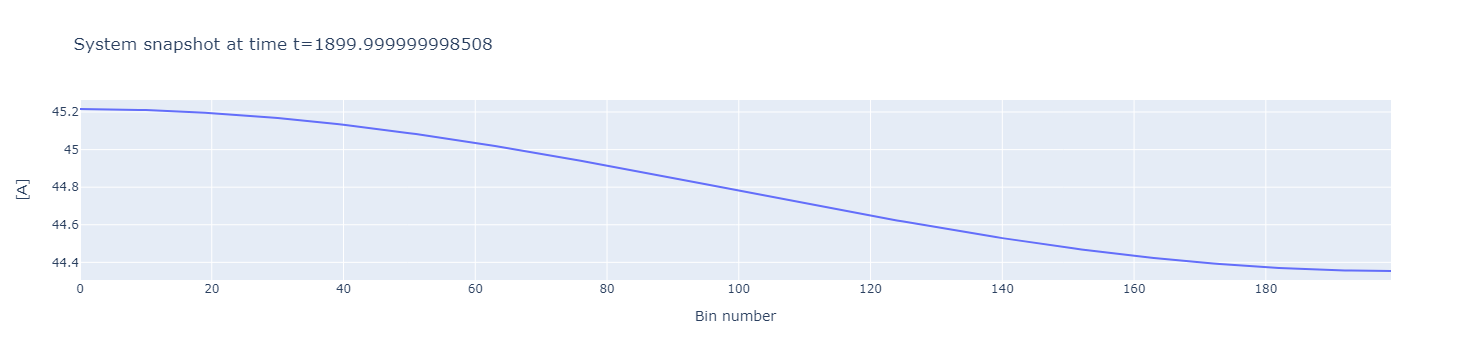

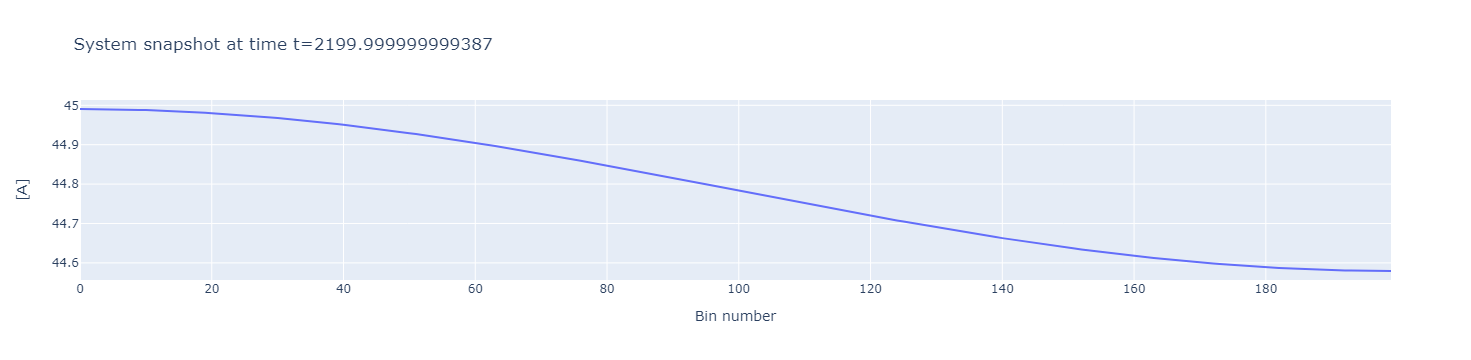

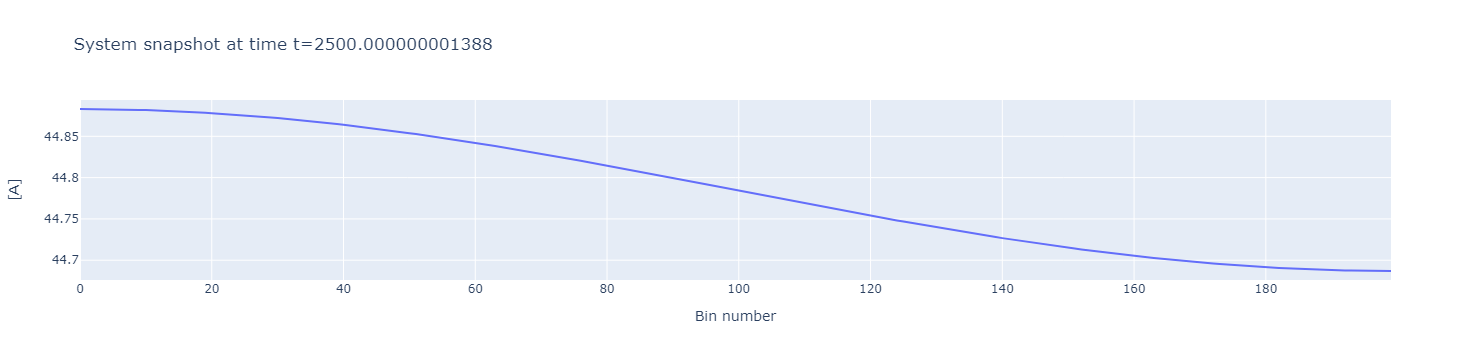

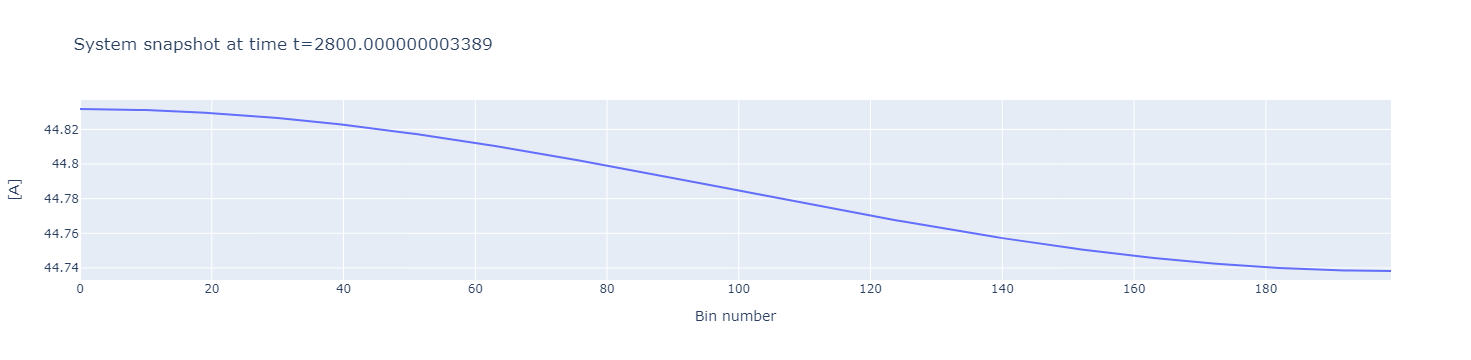

In [9]:
# Do more rounds of diffusion, over large times spans
for _ in range(9):
    bio.diffuse(total_duration=300, n_steps=10000)
    bio.visualize_system()

The system is **approaching equilibrium** at a value a little less than 45.   

That's consisten with the contribution from:  
1) a slightly truncated bell curve (whose total un-truncated area underneath is 1, multiplied by the "amplitude" factor of 20)
2) the 50-0 gradient (with average value 25)